In [26]:
# Import Libraries
import pandas as pd
# We will commonly use pandas to handle dataframes, which is a crucial library for handling datasets in ML tasks.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from pickle import dump

In [13]:
# import dataset(s)
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", sep = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


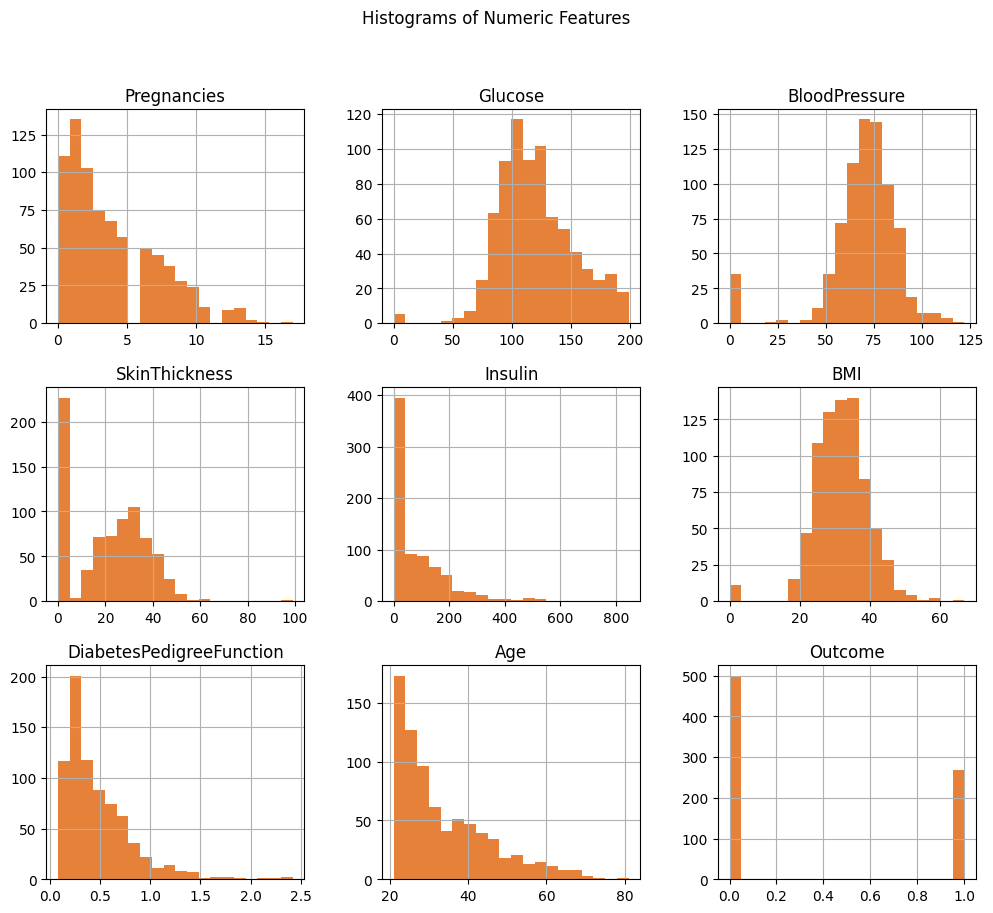

In [15]:
# Plot histograms for each numeric feature
df.hist(figsize=(12, 10), bins=20, color="#E58139")
plt.suptitle("Histograms of Numeric Features")
plt.show()

In [16]:
# Removing values that should not be 0 "zero"
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Drop rows where any of the specified columns have a value of 0
df = df[(df[columns_to_check] != 0).all(axis=1)]

# Check the DataFrame after dropping
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


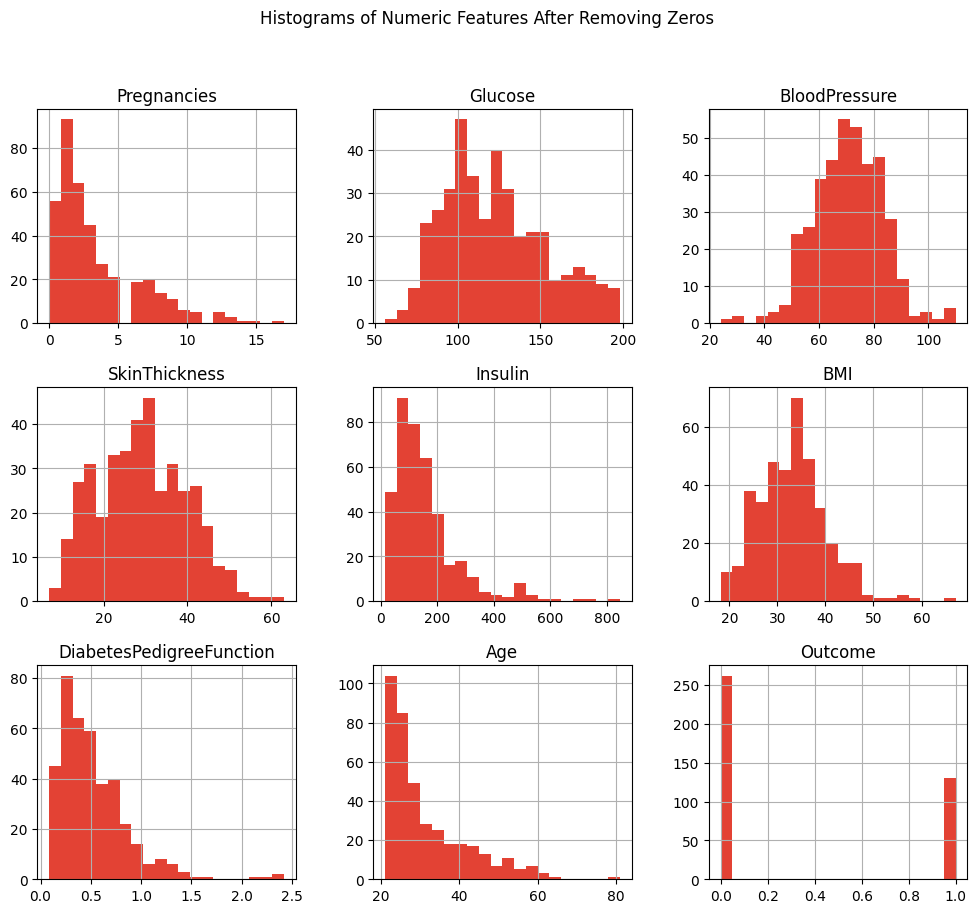

In [17]:
df.hist(figsize=(12, 10), bins=20, color="#E34234")  # Hex code for vermilion red
plt.suptitle("Histograms of Numeric Features After Removing Zeros")
plt.show()

In [18]:
# Splitting data into features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest for feature selection, choosing top 7 features
kbest_selector = SelectKBest(k=7)
X_train_sel = pd.DataFrame(kbest_selector.fit_transform(X_train, y_train), columns=X_train.columns[kbest_selector.get_support()])

# Apply the same transformation to the test set
X_test_sel = pd.DataFrame(kbest_selector.transform(X_test), columns=X_train.columns[kbest_selector.get_support()])

# Display the first few rows of the selected features
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0.0,180.0,90.0,26.0,90.0,36.5,35.0
1,3.0,81.0,86.0,16.0,66.0,27.5,22.0
2,8.0,126.0,88.0,36.0,108.0,38.5,49.0
3,2.0,96.0,68.0,13.0,49.0,21.1,26.0
4,3.0,80.0,82.0,31.0,70.0,34.2,27.0


In [19]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,7.0,102.0,74.0,40.0,105.0,37.2,45.0
1,0.0,127.0,80.0,37.0,210.0,36.3,23.0
2,4.0,85.0,58.0,22.0,49.0,27.8,28.0
3,0.0,162.0,76.0,56.0,100.0,53.2,25.0
4,0.0,181.0,88.0,44.0,510.0,43.3,26.0


In [20]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/clean_train.csv", index = False)
X_test_sel.to_csv("../data/clean_test.csv", index = False)

In [21]:
train_data = pd.read_csv("../data/clean_train.csv")
test_data = pd.read_csv("../data/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,0.0,180.0,90.0,26.0,90.0,36.5,35.0,1
1,3.0,81.0,86.0,16.0,66.0,27.5,22.0,0
2,8.0,126.0,88.0,36.0,108.0,38.5,49.0,0
3,2.0,96.0,68.0,13.0,49.0,21.1,26.0,0
4,3.0,80.0,82.0,31.0,70.0,34.2,27.0,1


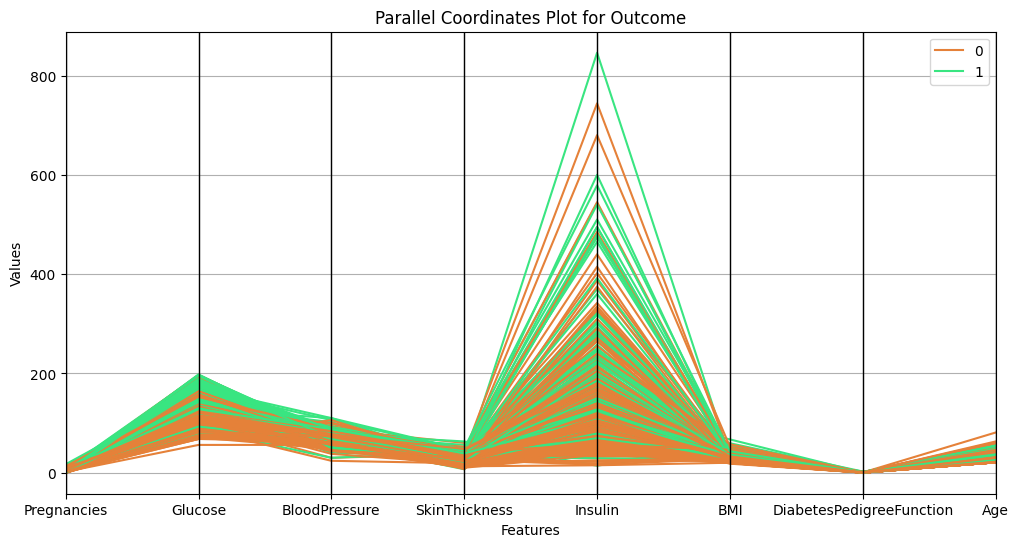

In [22]:
plt.figure(figsize=(12, 6))
plt.title("Parallel Coordinates Plot for Outcome")

# Parallel coordinates plot using df and custom color palette
pd.plotting.parallel_coordinates(df, "Outcome", color=("#E58139", "#39E581", "#8139E5"))

# Adding axis labels and grid for clarity
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)

plt.show()

In [23]:
# General info about the dataset
print("Train Data Overview")
train_data.info()

# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())

# Basic statistics summary of the dataset
print("\nSummary Statistics:")
print(train_data.describe())

Train Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    313 non-null    float64
 1   Glucose        313 non-null    float64
 2   BloodPressure  313 non-null    float64
 3   SkinThickness  313 non-null    float64
 4   Insulin        313 non-null    float64
 5   BMI            313 non-null    float64
 6   Age            313 non-null    float64
 7   Outcome        313 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 19.7 KB

Missing Values:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   313.000000  313.000000     313.000000     313.000000  313.000000   
mean      3.226837  122.993610

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


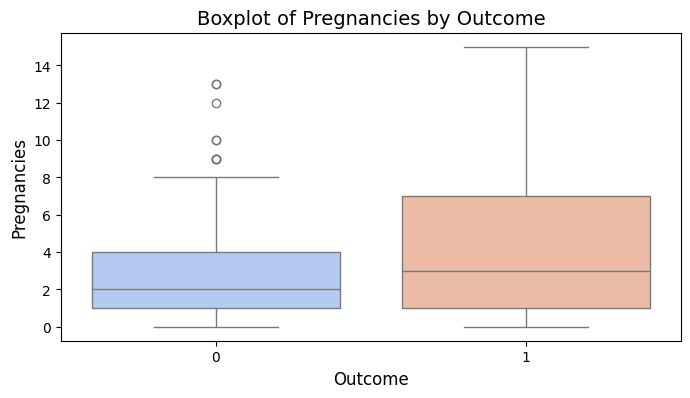

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


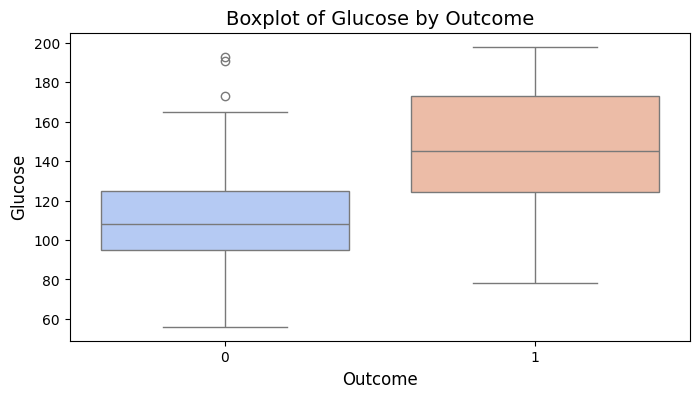

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


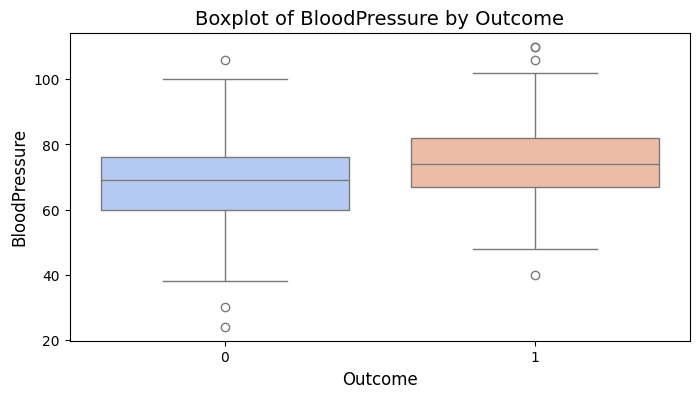

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


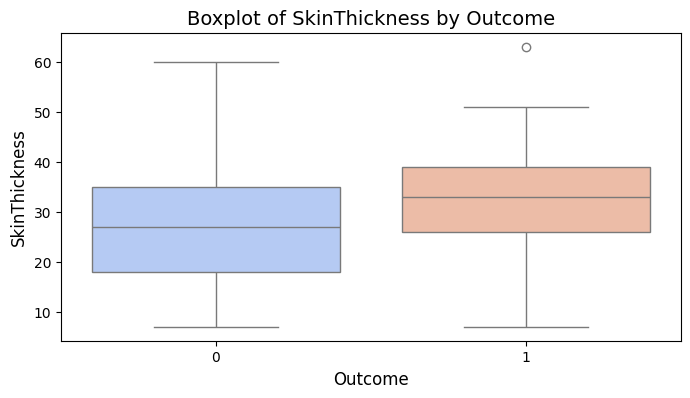

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


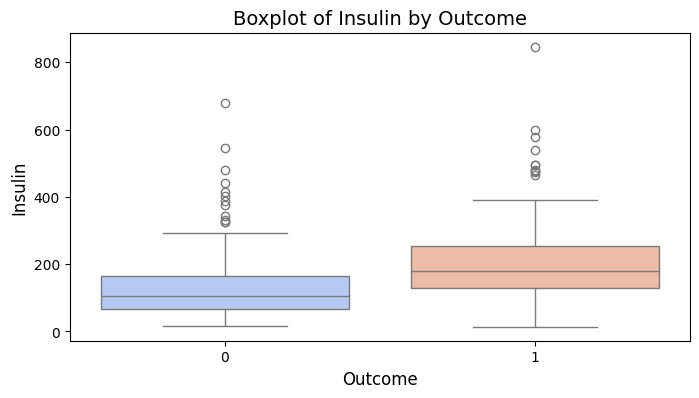

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


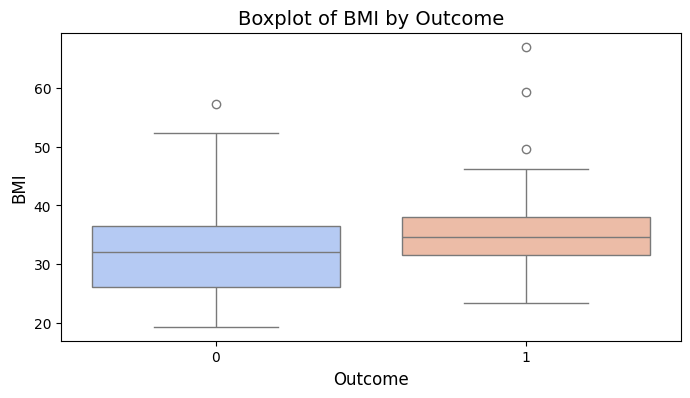

/tmp/ipykernel_13443/782872719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette


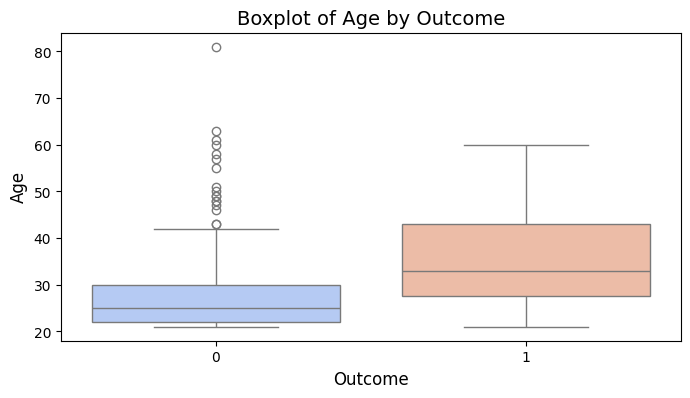

In [25]:
for column in train_data.drop(columns='Outcome').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=train_data, palette="coolwarm")  # Using coolwarm palette
    plt.title(f'Boxplot of {column} by Outcome', fontsize=14)
    plt.xlabel('Outcome', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

In [52]:
model = RandomForestClassifier(random_state = 42, n_estimators= 150)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

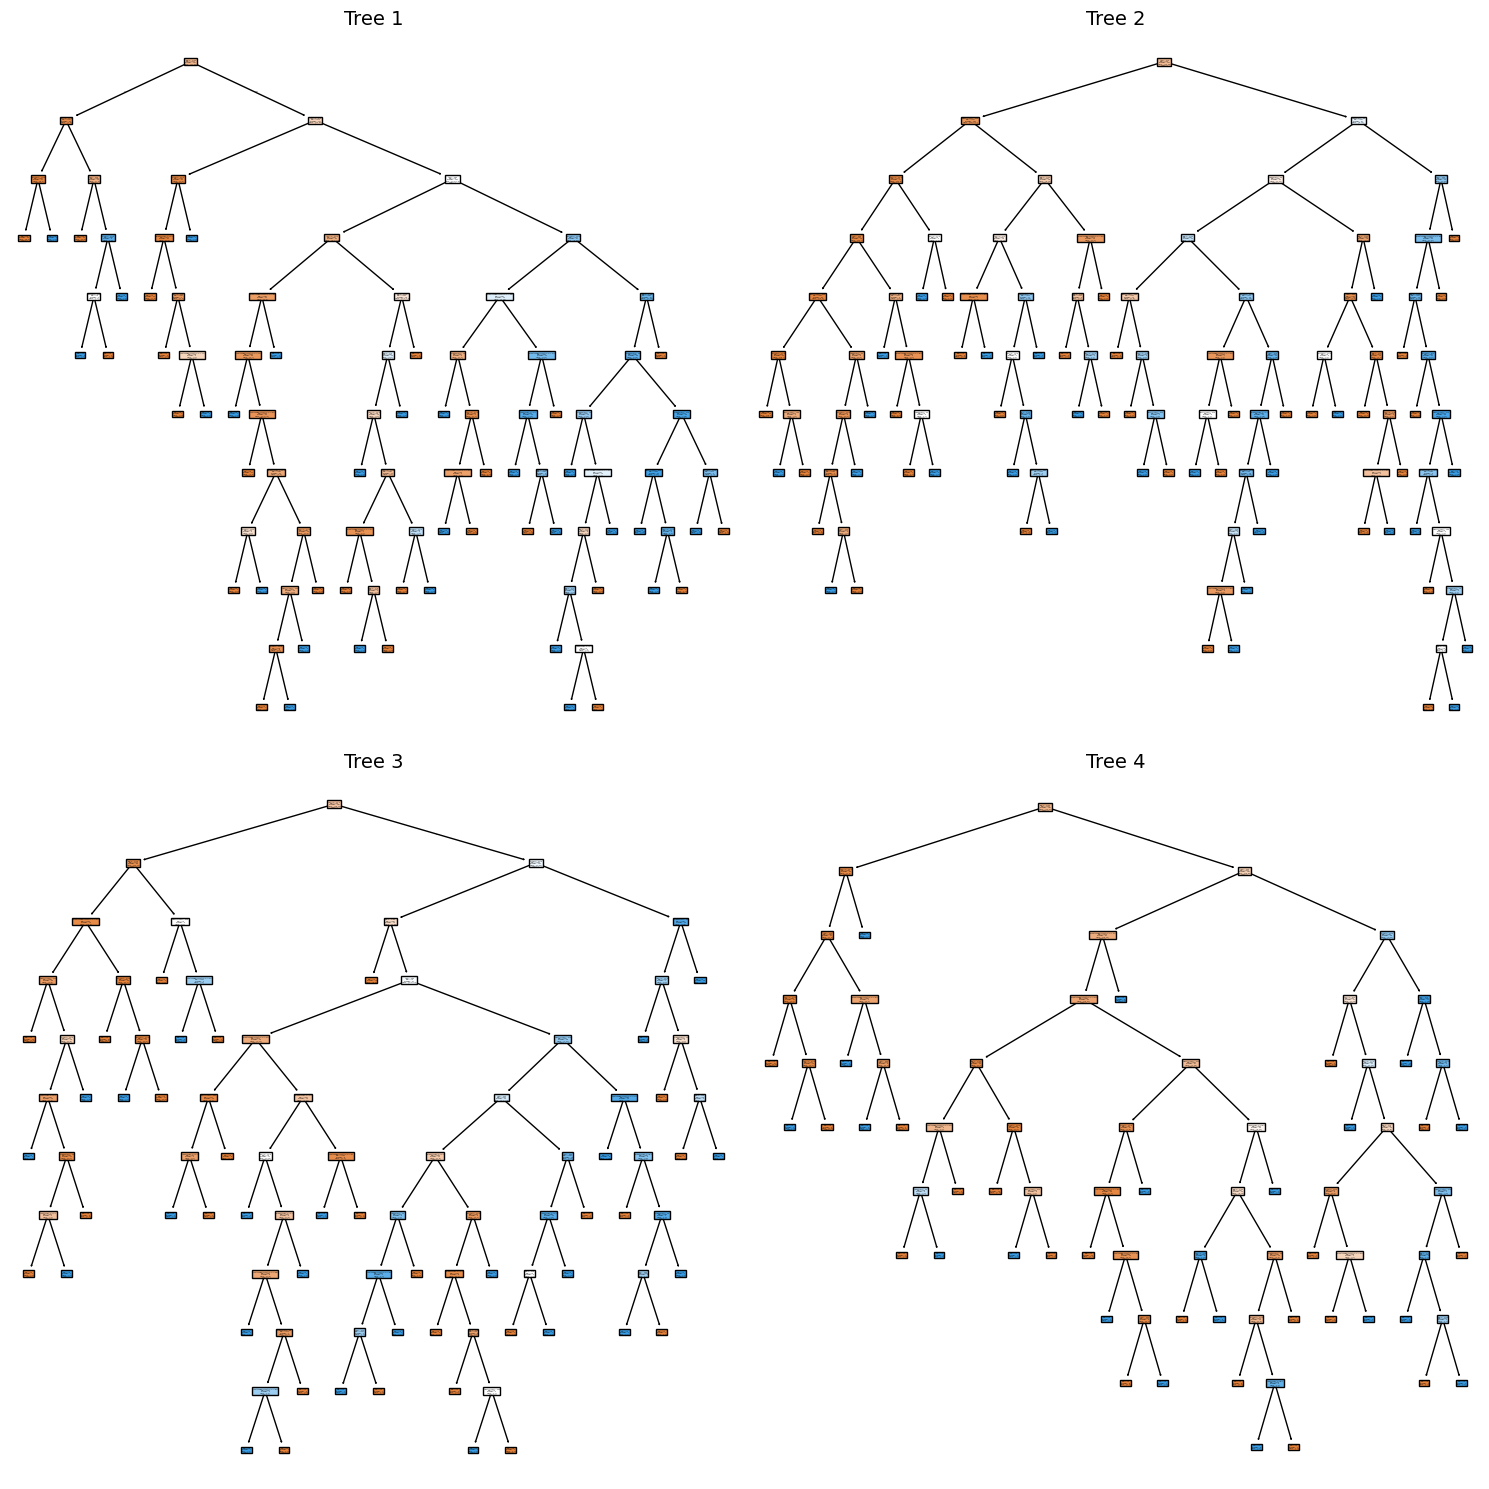

In [53]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axis.flat):
    tree.plot_tree(
        model.estimators_[i], 
        ax=ax, 
        feature_names=list(X_train.columns), 
        class_names=["0", "1", "2"], 
        filled=True
    )
    ax.set_title(f'Tree {i+1}', fontsize=14)

plt.tight_layout()
plt.show()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [55]:
accuracy_score(y_test, y_pred)

0.7974683544303798

In [56]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))